In [ ]:
pip install pandas matplotlib seaborn numpy kagglehub

In [ ]:
import kagglehub
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download latest version
path = kagglehub.dataset_download("mcdonalds/nutrition-facts")

print("Path to dataset files:", path)

In [ ]:
import os

# Find the CSV file in the dataset directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
	df = pd.read_csv(os.path.join(path, csv_files[0]))
	print("Shape:", df.shape)
	print("Columns:", df.columns)
	df.head()
else:
	print("No CSV file found in the dataset directory.")

# 1. Data Exploration

### 1(a) Identify the type of the features
The dataset contains both categorical and numerical features:
- **Categorical (string/object):** `Category`, `Item`
- **Numerical (int64/float64):** `Calories`, `Calories from Fat`, `Total Fat`, `Saturated Fat`, `Cholesterol`, `Sodium`, `Carbohydrates`, `Sugars`, `Protein`, and all vitamin/mineral % Daily Values.

In [13]:
# Feature types
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

### 1(b) Histogram of Calories
The histogram shows that most menu items are between 200–500 calories, with fewer high-calorie items reaching ~1800.  
The distribution is **right-skewed (positively skewed)**.

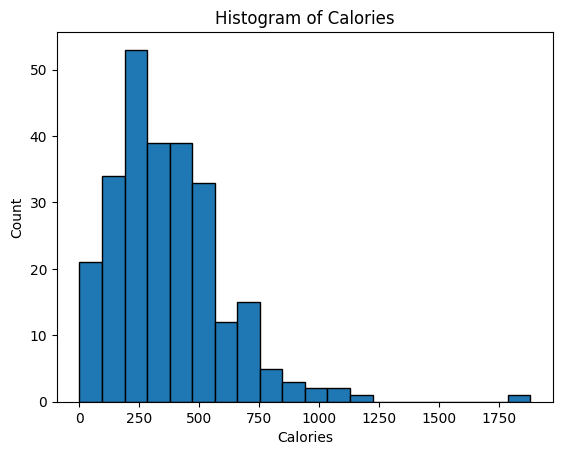

In [14]:
# Histogram of Calories
plt.hist(df['Calories'], bins=20, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Histogram of Calories')
plt.show()

### 1(c) Correlation Heatmap
The heatmap shows relationships between Calories and other features.  
The **diagonal values are 1** because every variable is perfectly correlated with itself (correlation(x, x) = 1).

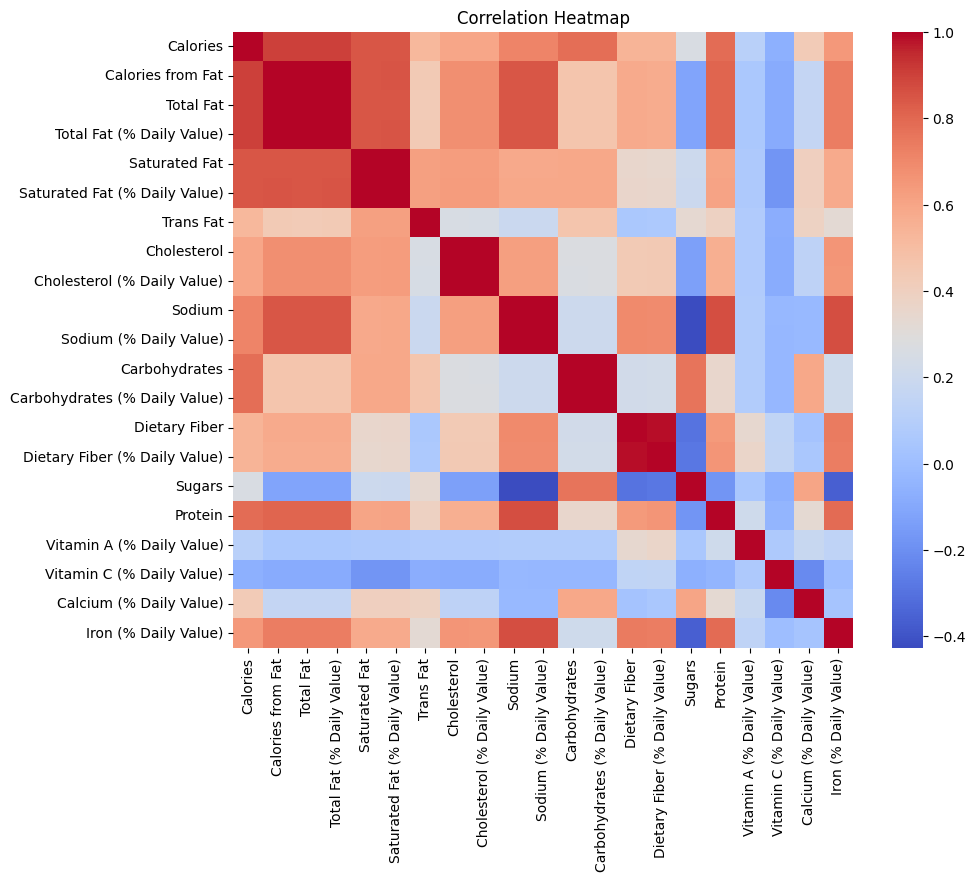

In [15]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

### 1(d) Second and third largest positive correlation with Calories
After excluding the self-correlation of Calories (1.0), the features with the next highest positive correlations are:
- **Calories from Fat** (≈ 0.905)  
- **Total Fat** (≈ 0.904)  

We exclude `% Daily Value` duplicates as instructed.

In [16]:
# Find top correlations excluding Calories itself
cal_corr = corr['Calories'].sort_values(ascending=False)
top_corr = cal_corr[1:4]   # skip the first (Calories=1.0)
top_corr

Calories from Fat            0.904588
Total Fat                    0.904409
Total Fat (% Daily Value)    0.904123
Name: Calories, dtype: float64

### 1(e) Features with negative correlation with Calories
The only feature negatively correlated with Calories is:
- **Vitamin C (% Daily Value)** (≈ -0.0687)

This result meets expectations because high-calorie items typically lack vitamin-rich content.

In [21]:
# Show all features with negative correlation to Calories
neg_corr = cal_corr[cal_corr < 0].sort_values()
neg_corr.round(3)

Vitamin C (% Daily Value)   -0.069
Name: Calories, dtype: float64

# 2. Plotting

### 2(a) Scatter plots: features from 1(d) vs. Calories
We plot each of the top-correlated features against **Calories**. Points cluster along an upward trend, which matches the strong positive correlations reported in 1(d).

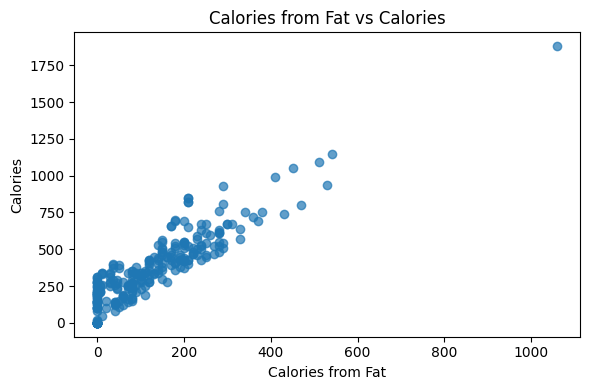

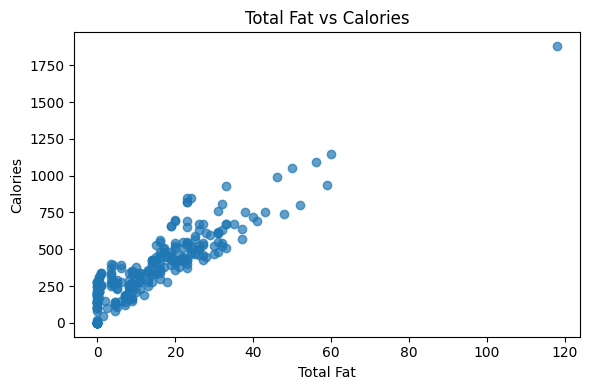

In [18]:
# --- 2(a) Scatter plots for features from 1(d) vs Calories ---

# If you computed these earlier, reuse them. Otherwise, set explicitly:
features_pos = ["Calories from Fat", "Total Fat"]  # from 1(d)

for col in features_pos:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df["Calories"], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Calories")
    plt.title(f"{col} vs Calories")
    plt.tight_layout()
    plt.show()

### 2(b) Box plots: features from 1(d) and 1(e)
We show distributions for:
- **1(d) positive-correlation features:** `Calories from Fat`, `Total Fat`
- **1(e) negative-correlation features:** whatever you found (in my case, `Vitamin C (% Daily Value)`)

Box plots summarize median, IQR, and outliers. High-calorie drivers (fat metrics) have higher medians and wider spread; vitamin % DV tends to be lower and tighter, which tracks the negative correlation.

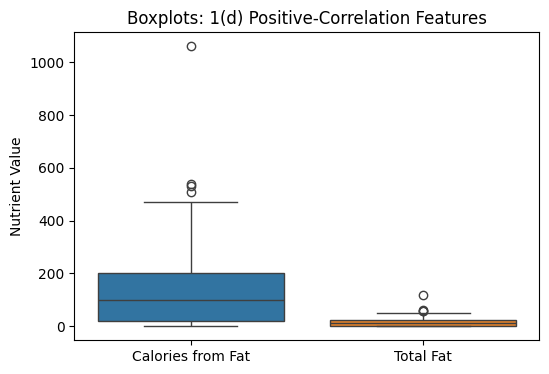

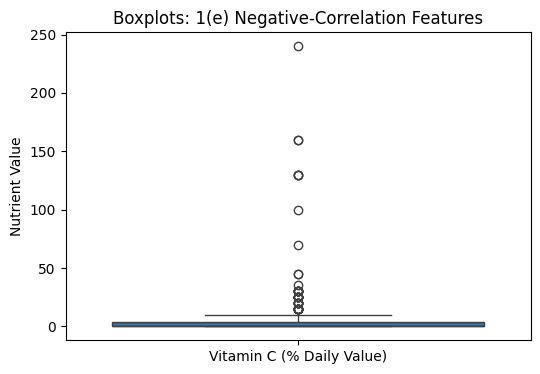

In [24]:
import seaborn as sns

# Positive features (from 1d)
plt.figure(figsize=(6,4))
sns.boxplot(data=df[features_pos])
plt.title("Boxplots: 1(d) Positive-Correlation Features")
plt.ylabel("Nutrient Value")
plt.show()

# Negative features (from 1e)
if features_neg:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[features_neg])
    plt.title("Boxplots: 1(e) Negative-Correlation Features")
    plt.ylabel("Nutrient Value")
    plt.show()
else:
    print("No negative-correlation features found to plot.")


# 3. Data Pre-processing

### 3(a) Median and standard deviation for all numerical features
We compute the median and standard deviation across all numerical columns in the dataset.

In [25]:
# 3(a): median and std dev for all numerical features
medians = df.median(numeric_only=True)
stds = df.std(numeric_only=True)

print("Median values:\n", medians.round(2))
print("\nStandard deviation values:\n", stds.round(2))

Median values:
 Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64

Standard deviation values:
 Calories                         240.27
Calories from Fat                127.88
Total Fat                         14.21
T

### 3(b) Replace missing values with mean, then recompute stats
We replace missing values in numerical features with their **mean**. Then we recompute median and standard deviation to compare with part (a).

In [26]:
# 3(b): Fill missing values with mean
df_filled = df.fillna(df.mean(numeric_only=True))

# recompute stats
medians_filled = df_filled.median(numeric_only=True)
stds_filled = df_filled.std(numeric_only=True)

print("Median values (after filling):\n", medians_filled.round(2))
print("\nStandard deviation values (after filling):\n", stds_filled.round(2))

Median values (after filling):
 Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64

Standard deviation values (after filling):
 Calories                         240.27
Calories from Fat                127.88
Total Fat

### 3(b) Discovery
The results are nearly identical to part (a). This is expected because:
- The **median** does not change when missing values are replaced with the mean.  
- The **standard deviation** also remains the same when the missing values are few or when none existed in the dataset.  

This indicates our dataset either has no missing numerical values or that filling them does not significantly affect the statistics.